# GERENCIAMENTO DE PACOTES

Julia possui um módulo gerenciador de pacotes integrado escrito totalmente em Julia chamado de **"Pkg"** que foi totalmente reformulado para a versão 1.0.x. O módulo `Pkg()` é muito versátil e permite instalar e remover pacotes, listar pacotes instalados e disponiveis no respositório oficial, resolver dependências, realizar atualizações e outras funcionalidades. 

Todos os pacotes, incluíndo a própria linguagem Julia, estão contidos em repositórios no [GitHub](https://www.github.com). Os pacotes são classificados em registrados (registered packages) e não registrados (unregistered package). A lista de pacotes de Julia registrados inclui mais de 1900 e pode ser encontrada em http://pkg.julialang.org.

## DIRETÓRIO DE PACOTES

Os pacotes baixados dos repositórios do GitHub são armazenados em um diretório na máquina local dado por: ```C:\users\username\.julia\dev``` para sistemas operacionais Windows ou ```/home/usuário/.julia/dev/ para Linux```.

In [1]:
using Pkg

In [2]:
Pkg.devdir()

"/home/pedrohnv/.julia/dev"

## LISTANTO PACOTES INSTALADOS

A função `Pkg.installed()` retorna um dicionário contendo os nomes e versão dos pacotes instalados.

In [3]:
Pkg.installed()

Dict{String,Union{Nothing, VersionNumber}} with 11 entries:
  "CSV"                  => v"0.5.12"
  "NumericalIntegration" => v"0.2.1"
  "Measurements"         => v"2.1.1"
  "LinearAlgebra"        => nothing
  "IJulia"               => v"1.20.0"
  "Plots"                => v"0.26.3"
  "HCubature"            => v"1.4.0"
  "Unitful"              => v"0.17.0"
  "DataFrames"           => v"0.19.4"
  "SpecialFunctions"     => v"0.8.0"
  "FFTW"                 => v"1.0.0"

`Pkg.status()` Imprime um resumo dos pacotes que estão instalados e a versão, dividindo-os entre os essenciais(required) e os adicionais(additional). Caso ocorra o erro `ErrorException`("Não é possível ler o diretório METADATA") ao executar `Pkg.status()`, execute `Pkg.init()` para criar as pastas do repositório de pacotes e clonar o arquivo METADATA do GitHub.

In [4]:
Pkg.status()

    Status `~/.julia/environments/v1.2/Project.toml`
  [336ed68f] CSV v0.5.12
  [a93c6f00] DataFrames v0.19.4
  [7a1cc6ca] FFTW v1.0.0
  [19dc6840] HCubature v1.4.0
  [7073ff75] IJulia v1.20.0
  [eff96d63] Measurements v2.1.1
  [5f557876] NumericalIntegration v0.2.1 [`~/.julia/dev/NumericalIntegration`]
  [91a5bcdd] Plots v0.26.3
  [276daf66] SpecialFunctions v0.8.0
  [1986cc42] Unitful v0.17.0
  [37e2e46d] LinearAlgebra 


## TESTES DOS PACOTES INSTALADOS

`Pkg.test()` executa os testes para todos os pacotes instalados. Um pacote é testado executando seu arquivo de testes (runtest.jl) e de suas dependencias de testes (REQUIRE) localizados no diretório /home/USUÁRIO/.julia/dev/NOME_PACOTE/test. O arquivo runtest.jl contém comandos que testam as funcionalidades do pacote e caso todos os teses sejam realizados com sucesso, será exibida a mensagem "tests passed" caso contrário "Test Failed". A realização de testes é importante para verificar se há conflitos ou erros de alguma dependência entre os pacotes instalados e dessa forma manter a estabilidade dos pacotes escritos em Julia. Para executar testes de um pacote específico use:
```julia
Pkg.test("Nome_pacote")
```

## ATUALIZAÇÃO DE PACOTES

A atualização de todos os pacotes (é recomendado atualizar todos os pacotes a fim de evitar dependências não resolvidas) é realizada através da função `Pkg.update()`. Ao executar esta função, é realizado novas alterações no aquivo METADATA (/home/USUARIO/.julia/v1.2/) e será consultado se novas versões do pacote registrado foram publicadas. Depois disso, `Pkg.update()` tenta atualizar pacotes que são verificados em um ramo e não sujos (ou seja, não foram feitas alterações nos arquivos rastreados pelo git), puxando as alterações do repositório upstream do pacote. As mudanças a montante só serão aplicadas se nenhuma fusão ou rebase for necessária - ou seja, se o ramo pode ser ["encaminhado rapidamente"](https://git-scm.com/book/pt-br/v2/Git-Branching-Basic-Branching-and-Merging). Se o ramo não puder ser encaminhado rapidamente, assume-se que você está trabalhando nisso e atualizará o repositório você mesmo. 

É uma boa prática executar este comando periodicamente para manter pacotes na condição mais atualizada (NAGAR, 2017)

In [5]:
Pkg.update()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


## INSTALAÇÃO DE PACOTES

O gerente de pacotes de Julia é declarativo e não imperativo. Isso significa que ao ser executado a função de instalação de pacotes, o gerenciador fará a verificação de versão do pacote, download dos arquivos e solução de dependências de forma optmizada. De forma resumida, o processo de instalação de um pacote segue os seguintes passos:

1. O nome do pacote é adicionado ao arquivo REQUIRE localizado em ```C:\users\username\.julia\dev``` ou ```/home/USUARIO/.julia/dev```; 

2. a função `Pkg.resolve()` é executado automaticamente e então é realizada uma verificação no arquivo REQUIRE dos pacotes que deverão ser instalados.

3. É verificado no arquivo METADATA qual é a versão mais atual e compatível do pacote com a versão da linguagem Julia instalada;

4. Os arquivos do pacote são clonados do repositório do Github para o diretório ```home/USUARIO/.julia/dev/Nome_pacote``` na máquina do usuário;

5. A função `Pkg.resolve()` procura e resolve dependências clonando outros pacotes do GitHub se necessários.

A linguagem Julia possui pacotes registrados e não registraos (não adicionados ao diretório METADATA) listados na página `www.pkg.julialang.org`. Pacotes não registrados são projetos feitos por programadores individuais ou empresas, disponibilizados em repositórios do GitHub. É importante ter bastante cuidado ao instalar pacotes não registrados pois pode comprometer a instabilidade e segurança do sistema. Os pacotes utilizados neste livro foram:

|Registrados                                                                           |
|:------------------------------------------------------------------------------------:|
| IJulia, PyCall, Plots, GR, PlotlyJS, PyPlot, XLSX, Maxima, SymPy, LsqFit             |
| Interact, Compose, Compat, BenchmarkTools, LaTeXStrings, PGFPlots, PkgDev            |


| Não Registrados                                                                      |
|:------------------------------------------------------------------------------------:|
| NumericalMath, CalcCL(projeto teste didático)                                        |
    
    
Para instalar um pacote registrado use:
```julia
using Pkg
Pkg.add("Nome_Pacote")
```

In [6]:
Pkg.add("SymPy")

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
  [24249f21] + SymPy v1.0.6
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [00ebfdb7] + CSTParser v0.6.2
  [1914dd2f] + MacroTools v0.5.1
  [438e738f] + PyCall v1.91.2
  [24249f21] + SymPy v1.0.6
  [0796e94c] + Tokenize v0.5.6


Para instalar um pacote não registrado, basta executar a função `Pkg.clone()` da seguinte forma: 
```julia
Pkg.clone("https://github.com/usuario/pacote.jl.git")
```
Para instalar o `NumericalMath` execute:

In [7]:
Pkg.clone("https://github.com/dextorious/NumericalIntegration.jl")

  Updating git-repo `https://github.com/dextorious/NumericalIntegration.jl`


┌ Warning: Pkg.clone is only kept for legacy CI script reasons, please use `add`
└ @ Pkg.API /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Pkg/src/API.jl:406


 Resolving package versions...


┌ Info: Path `/home/pedrohnv/.julia/dev/NumericalIntegration` exists and looks like the correct package, using existing path
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Pkg/src/Types.jl:535


  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


Sempre após instalar uma nova versão da linguagem Julia, execute `Pkg.build ("IJulia")`, a fim de reconstruir o pacote `iJulia` com esta nova versão.

## REMOÇÃO DE PACOTES

Para desinstalar um pacote use: 
```julia
Pkg.rm("nome_pacote")
```


Desistalar o pacote gráfico `Winston.jl`.

In [8]:
Pkg.rm("SymPy")

  Updating `~/.julia/environments/v1.2/Project.toml`
  [24249f21] - SymPy v1.0.6
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [00ebfdb7] - CSTParser v0.6.2
  [1914dd2f] - MacroTools v0.5.1
  [438e738f] - PyCall v1.91.2
  [24249f21] - SymPy v1.0.6
  [0796e94c] - Tokenize v0.5.6


## UTILIZANDO UM PACOTE INSTALADO

Para usar um pacote devemos executar sem aspas e com letra inicial maiúscula o seguinte comando:
```julia
using "Nome_do_pacote"
```

In [9]:
using NumericalIntegration

In [12]:
integrate([0, 1, 2, 3, 4], [-1, 0, 4, 5, 9])

13//1

In [13]:
using Plots
gr()

Plots.GRBackend()

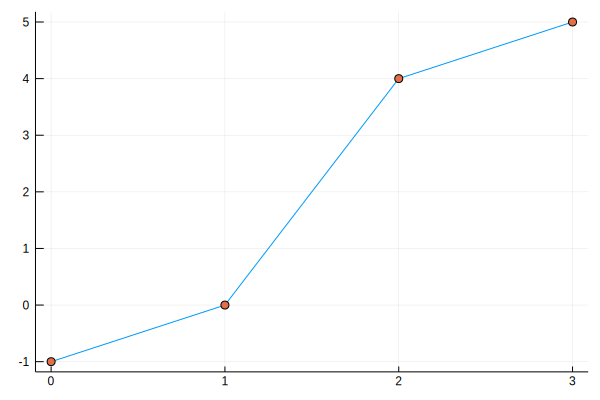

In [14]:
plot([0, 1, 2, 3], [-1, 0, 4, 5], label="")
scatter!([0, 1, 2, 3], [-1, 0, 4, 5], label="")

## REFERENCIA BIBIOGRÁFICA

NAGAR, Sandeep. **Beginning Julia Programming: For Engineers and Scientists**. 1. ed. New York: SPRINGER, 2017